**Methodology**

1. Imported all the data frames 
2. Filtered the dates based on the months of the production data between '2015-01-01 00:00:00+00:00' &  '2020-12-31 00:00:00+00:00'
3. Converted end date to date format 
4. Resampled it to monthly data 
5. Taken the average of the quantity (Preciptaion, Sol Moisture, Temp, NDVI)
6. Ran LSTM model 


*   I have chosen this model in place of the ARIMAX/SARIMX is because this is a multivariate Time Series Problem and the main issue here is the regions, as we have 10 regions.   
* The optimal  P, D, Q values for the ARIMA model would be different for all the regions, so we cannot generalize these values for all the regions as it affects the outcome.   
*   As the assignment's time duration is 5 hrs. I felt this would be feasible to use an LSTM model. For 10 different regions they need to be predicted Individually. 
* This can simply be used for all the regions individually, and the model's accuracy is around 70, which is decent for the amount of data (70 months). If we have more data (monthly) or daily frequency of all the parameters, this model will outperform the time series model.  

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ! pip install scalecast==0.1.8
# ! pip install pandas-datareader
# ! pip install fbprophet
# from scalecast.Forecaster import Forecaster

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

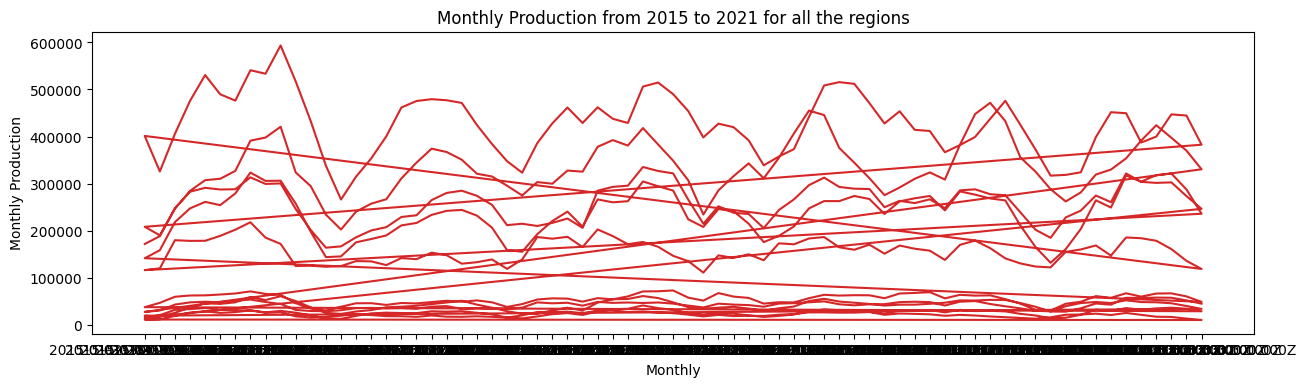

In [4]:
def plot_df(df1, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df1, x=df1['end_date'], y=df1['prod'], title='Monthly Production from 2015 to 2021 for all the regions')

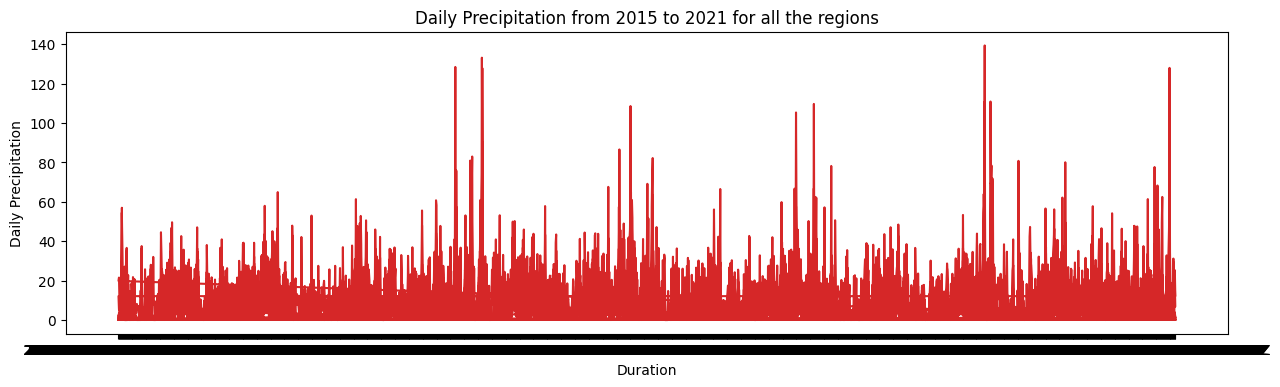

In [5]:
def plot_df(df2, x, y, title="", xlabel='Duration', ylabel='Daily Precipitation', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df2, x=df2['end_date'], y=df2['precip'], title='Daily Precipitation from 2015 to 2021 for all the regions')

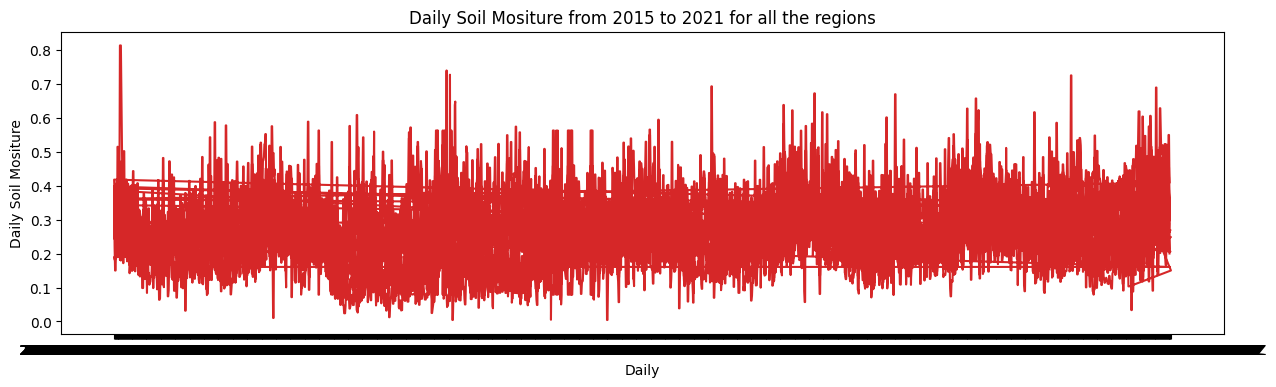

In [6]:
def plot_df(df3, x, y, title="", xlabel='Daily', ylabel='Daily Soil Mositure', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df3, x=df3['end_date'], y=df3['smos'], title='Daily Soil Mositure from 2015 to 2021 for all the regions')

In [7]:
def extract_region_df(code = 93):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

In [8]:
df = extract_region_df(93)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [9]:
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var5(t)
1,0.265960,0.457518,0.083424,0.536924,0.045990,0.142822
2,0.000000,0.298401,0.342165,0.606534,0.142822,0.490083
3,0.187565,0.066577,0.363183,0.463071,0.490083,0.693869
4,0.772472,0.048648,0.362431,0.707549,0.693869,0.742087
5,0.650809,0.234697,0.141015,0.824306,0.742087,0.721350


In [10]:
values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(60, 1, 5) (60,) (8, 1, 5) (8,)


Epoch 1/6
15/15 - 4s - loss: 0.4408 - val_loss: 0.5124 - 4s/epoch - 270ms/step
Epoch 2/6
15/15 - 0s - loss: 0.3069 - val_loss: 0.3324 - 73ms/epoch - 5ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2265 - val_loss: 0.1906 - 91ms/epoch - 6ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1948 - val_loss: 0.1342 - 75ms/epoch - 5ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1882 - val_loss: 0.1259 - 71ms/epoch - 5ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1832 - val_loss: 0.1270 - 79ms/epoch - 5ms/step


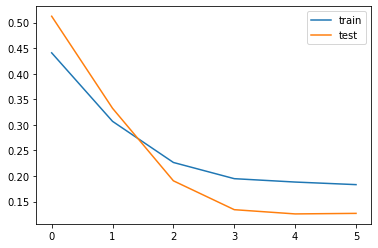

In [11]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Test MAPE: 0.389


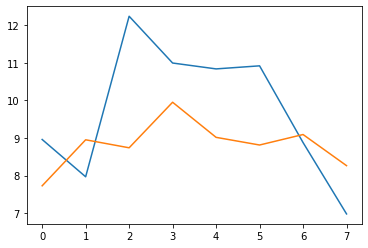

In [12]:
# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
rmse = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % rmse)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (10, 1, 5) (10,)
Epoch 1/6
15/15 - 3s - loss: 0.4332 - val_loss: 0.2564 - 3s/epoch - 170ms/step
Epoch 2/6
15/15 - 0s - loss: 0.2982 - val_loss: 0.1771 - 72ms/epoch - 5ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2057 - val_loss: 0.1637 - 70ms/epoch - 5ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1718 - val_loss: 0.1777 - 63ms/epoch - 4ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1610 - val_loss: 0.1826 - 66ms/epoch - 4ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1556 - val_loss: 0.1773 - 61ms/epoch - 4ms/step


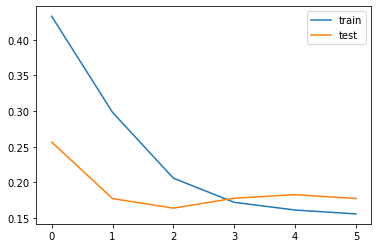

Test MAPE: 1.677


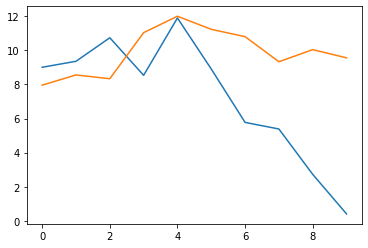

In [14]:
def extract_region_df(code = 94):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(94)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (10, 1, 5) (10,)
Epoch 1/6
15/15 - 2s - loss: 0.3873 - val_loss: 0.4502 - 2s/epoch - 158ms/step
Epoch 2/6
15/15 - 0s - loss: 0.2610 - val_loss: 0.3023 - 51ms/epoch - 3ms/step
Epoch 3/6
15/15 - 0s - loss: 0.1639 - val_loss: 0.1606 - 67ms/epoch - 4ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1193 - val_loss: 0.1188 - 60ms/epoch - 4ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1177 - val_loss: 0.1189 - 71ms/epoch - 5ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1155 - val_loss: 0.1226 - 64ms/epoch - 4ms/step


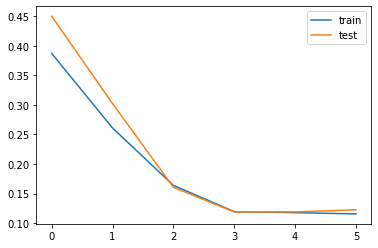

Test MAPE: 0.553


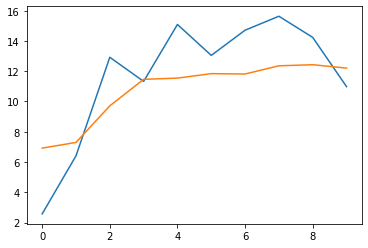

In [15]:
def extract_region_df(code = 95):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(95)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (8, 1, 5) (8,)
Epoch 1/6
15/15 - 2s - loss: 0.5355 - val_loss: 0.5815 - 2s/epoch - 140ms/step
Epoch 2/6
15/15 - 0s - loss: 0.3904 - val_loss: 0.3832 - 48ms/epoch - 3ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2563 - val_loss: 0.1944 - 51ms/epoch - 3ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1771 - val_loss: 0.1284 - 53ms/epoch - 4ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1683 - val_loss: 0.1313 - 54ms/epoch - 4ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1639 - val_loss: 0.1327 - 49ms/epoch - 3ms/step


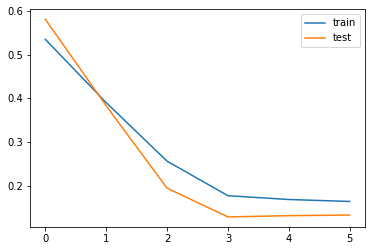

Test MAPE: 0.422


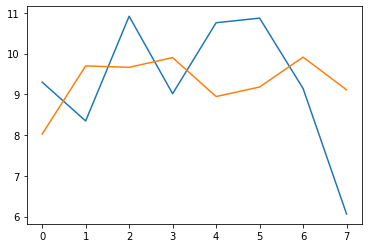

In [17]:
def extract_region_df(code = 97):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(97)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (8, 1, 5) (8,)
Epoch 1/6
15/15 - 2s - loss: 0.4434 - val_loss: 0.6119 - 2s/epoch - 139ms/step
Epoch 2/6
15/15 - 0s - loss: 0.3129 - val_loss: 0.4324 - 49ms/epoch - 3ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2180 - val_loss: 0.2766 - 51ms/epoch - 3ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1733 - val_loss: 0.1920 - 56ms/epoch - 4ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1603 - val_loss: 0.1721 - 54ms/epoch - 4ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1551 - val_loss: 0.1802 - 46ms/epoch - 3ms/step


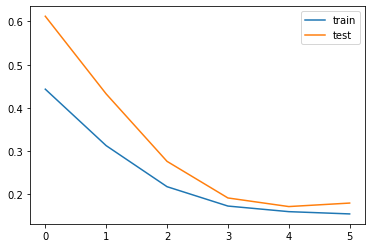

Test MAPE: 0.445


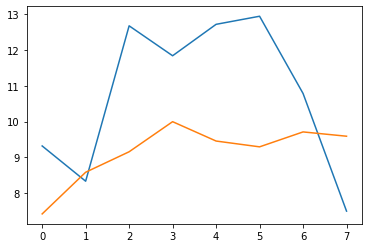

In [18]:
def extract_region_df(code = 98):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(98)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (10, 1, 5) (10,)
Epoch 1/6
15/15 - 3s - loss: 0.3548 - val_loss: 0.3043 - 3s/epoch - 177ms/step
Epoch 2/6
15/15 - 0s - loss: 0.2468 - val_loss: 0.2067 - 55ms/epoch - 4ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2009 - val_loss: 0.1707 - 51ms/epoch - 3ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1869 - val_loss: 0.1511 - 75ms/epoch - 5ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1826 - val_loss: 0.1463 - 53ms/epoch - 4ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1787 - val_loss: 0.1464 - 52ms/epoch - 3ms/step


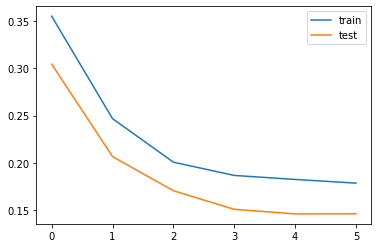

Test MAPE: 0.616


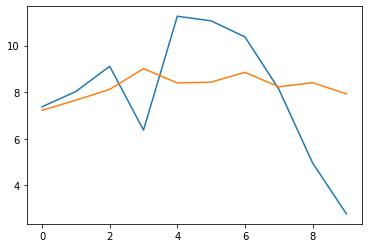

In [19]:
def extract_region_df(code = 99):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(99)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (10, 1, 5) (10,)
Epoch 1/6
15/15 - 4s - loss: 0.4519 - val_loss: 0.2841 - 4s/epoch - 239ms/step
Epoch 2/6
15/15 - 0s - loss: 0.3140 - val_loss: 0.1545 - 73ms/epoch - 5ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2017 - val_loss: 0.1178 - 71ms/epoch - 5ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1520 - val_loss: 0.1348 - 94ms/epoch - 6ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1424 - val_loss: 0.1401 - 54ms/epoch - 4ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1368 - val_loss: 0.1281 - 53ms/epoch - 4ms/step


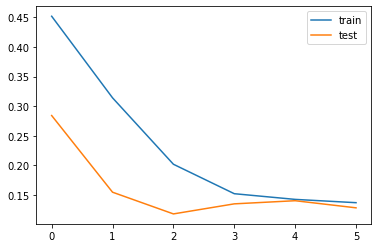

Test MAPE: 0.631


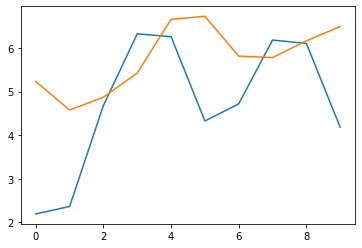

In [24]:
def extract_region_df(code = 102):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(102)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (10, 1, 5) (10,)
Epoch 1/6
15/15 - 2s - loss: 0.4364 - val_loss: 0.3904 - 2s/epoch - 139ms/step
Epoch 2/6
15/15 - 0s - loss: 0.3017 - val_loss: 0.2375 - 64ms/epoch - 4ms/step
Epoch 3/6
15/15 - 0s - loss: 0.1921 - val_loss: 0.1348 - 52ms/epoch - 3ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1514 - val_loss: 0.1181 - 47ms/epoch - 3ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1474 - val_loss: 0.1153 - 48ms/epoch - 3ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1414 - val_loss: 0.1120 - 73ms/epoch - 5ms/step


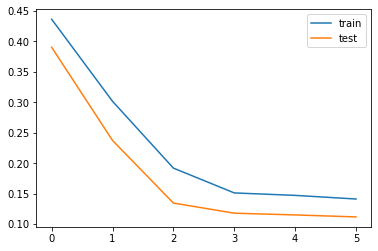

Test MAPE: 0.367


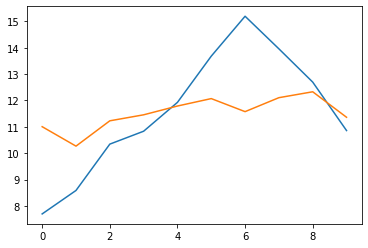

In [25]:
def extract_region_df(code = 103):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(103)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (8, 1, 5) (8,)
Epoch 1/6
15/15 - 3s - loss: 0.4211 - val_loss: 0.4154 - 3s/epoch - 175ms/step
Epoch 2/6
15/15 - 0s - loss: 0.2996 - val_loss: 0.2787 - 53ms/epoch - 4ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2154 - val_loss: 0.1874 - 49ms/epoch - 3ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1857 - val_loss: 0.1490 - 53ms/epoch - 4ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1793 - val_loss: 0.1388 - 48ms/epoch - 3ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1744 - val_loss: 0.1399 - 54ms/epoch - 4ms/step


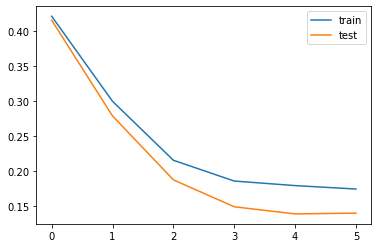

Test MAPE: 0.472


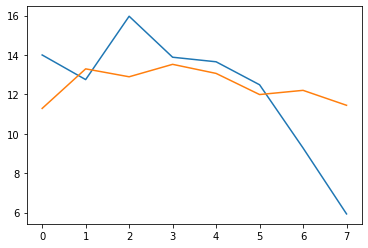

In [26]:
def extract_region_df(code = 104):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(104)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

(60, 1, 5) (60,) (6, 1, 5) (6,)
Epoch 1/6
15/15 - 2s - loss: 0.4720 - val_loss: 0.6490 - 2s/epoch - 144ms/step
Epoch 2/6
15/15 - 0s - loss: 0.3287 - val_loss: 0.4571 - 62ms/epoch - 4ms/step
Epoch 3/6
15/15 - 0s - loss: 0.2136 - val_loss: 0.2698 - 57ms/epoch - 4ms/step
Epoch 4/6
15/15 - 0s - loss: 0.1583 - val_loss: 0.1608 - 78ms/epoch - 5ms/step
Epoch 5/6
15/15 - 0s - loss: 0.1505 - val_loss: 0.1331 - 55ms/epoch - 4ms/step
Epoch 6/6
15/15 - 0s - loss: 0.1455 - val_loss: 0.1390 - 66ms/epoch - 4ms/step


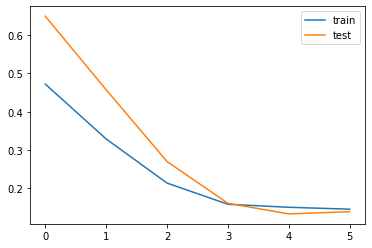

Test MAPE: 0.394


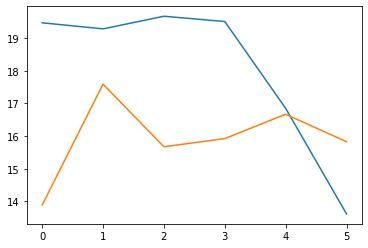

In [27]:
def extract_region_df(code = 105):
  df1= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Production Quantity.csv')
  df2= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Precipitation.csv')
  df3= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Soil Mositure.csv')
  df4= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Daily Temperature.csv')
  df5= pd.read_csv('/content/drive/MyDrive/Gro/Gro/gro_homework/Eight Day NDVI.csv')

  df1 = df1[(df1['start_date'] >= '2015-01-01 00:00:00+00:00') & (df1['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df2 = df2[(df2['start_date'] >= '2015-01-01 00:00:00+00:00') & (df2['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df3 = df3[(df3['start_date'] >= '2015-01-01 00:00:00+00:00') & (df3['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df4 = df4[(df4['start_date'] >= '2015-01-01 00:00:00+00:00') & (df4['end_date'] <= '2020-12-31 00:00:00+00:00')]
  df5 = df5[(df5['start_date'] >= '2015-01-01 00:00:00+00:00') & (df5['end_date'] <= '2020-12-31 00:00:00+00:00')]

  df_1 = df1[df1['region_id']==code]
  df_2 = df2[df2['region_id']==code]
  df_3 = df3[df3['region_id']==code]
  df_4 = df4[df4['region_id']==code]
  df_5 = df5[df5['region_id']==code]

  df_1["end_date"] = pd.to_datetime(df_1["end_date"])
  df_1 = df_1.resample('M', on = 'end_date').mean()

  df_2["end_date"] = pd.to_datetime(df_2["end_date"])
  df_2= df_2.resample('M', on = 'end_date').mean()

  df_3["end_date"] = pd.to_datetime(df_3["end_date"])
  df_3 = df_3.resample('M', on = 'end_date').mean()

  df_4["end_date"] = pd.to_datetime(df_4["end_date"])
  df_4 = df_4.resample('M', on = 'end_date').mean()

  df_5["end_date"] = pd.to_datetime(df_5["end_date"])
  df_5 = df_5.resample('M', on = 'end_date').mean()

  a= pd.merge(df_2, df_3, left_index=True, right_index=True)
  b = pd.merge(a, df_4, left_index=True, right_index=True)
  c = pd.merge(b, df_5, left_index=True, right_index=True)
  d = pd.merge(c, df_1, left_index=True, right_index=True)

  df = d.drop(['region_id_x', 'region_id_y', 'region_id'], axis = 1)
  df=df.reset_index()
  df["end_date"] = pd.to_datetime(df["end_date"])

  def plot_df(df, x, y, title="", xlabel='Monthly', ylabel='Monthly Production', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
  return df

##########################

df = extract_region_df(105)
df.head()
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = df
values = dataset.values[:,1:]
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[5,6,7,8]], axis=1, inplace=True)


############################################

values = reframed.values
n_train_hours = 60
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


#########################################


from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=6, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


#############################

# make a prediction
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate MAPE
MAPE = np.sqrt(mean_absolute_percentage_error(inv_y, inv_yhat))
print('Test MAPE: %.3f' % MAPE)

plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

All the models have to be considered individually to predict for the respective regions 